In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ARIMA_DATA.csv')
df.head()

,Month,Sales
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df["Month"] = pd.to_datetime(df["Month"],format="%Y-%m-%d")
df.head()

,Month,Sales
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df.set_index(['Month'], inplace=True)
df.head()

,Sales
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [36]:
# df =pd.read_csv("trend.csv",parse_dates=["login_date"],index_col=['login_date'])
# df.shape

(31, 1)

<AxesSubplot:xlabel='login_date'>

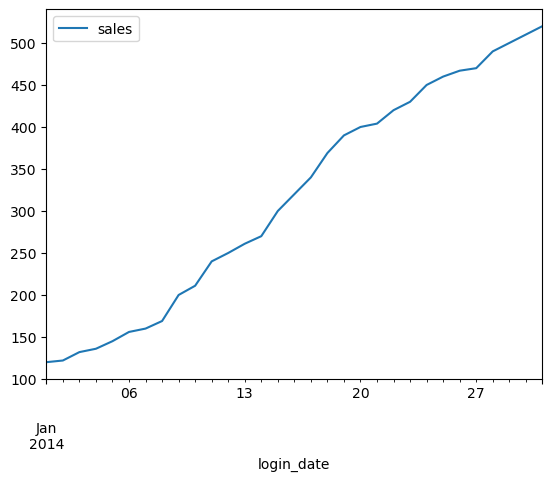

In [37]:
ts = df
ts.plot()

## Check stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

In [38]:
adf = adfuller(ts)
print("P value is =", adf[1])

P value is = 0.9639660116664333


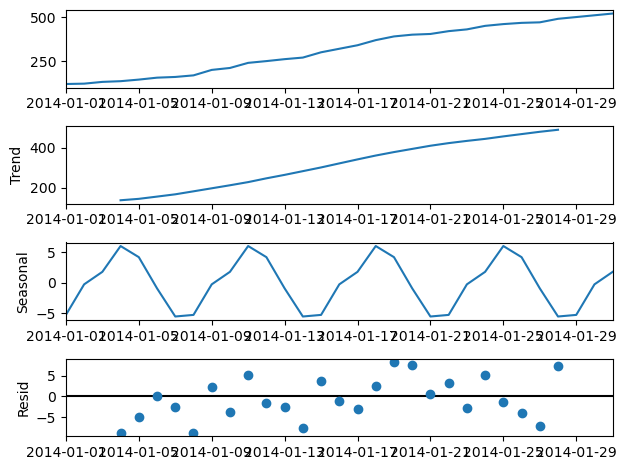

In [39]:
## Decompose the seasonality and trend
import statsmodels.api as sm
decompostion = sm.tsa.seasonal_decompose(ts,model="additive")
fig =decompostion.plot()
fig.show()

## Train test split

In [40]:
len(ts)

31

In [41]:
train = ts[:120]
test = ts[120:]

## ARIMA Model
1. AR -> p
2. Integrated - d
3. MA - q

In [13]:
import statsmodels.api as sm

In [54]:
model = sm.tsa.arima.ARIMA(train, order=(5,0,4)).fit()
# model = sm.tsa.arima.ARIMA(train, order=(8,2,8)).fit()

## Prediction

In [55]:
pred = model.predict(start=len(train),end=len(ts)-1)

In [56]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(test,pred))
error

4.262237284181758

In [57]:
test.std()

sales    21.358059
dtype: float64

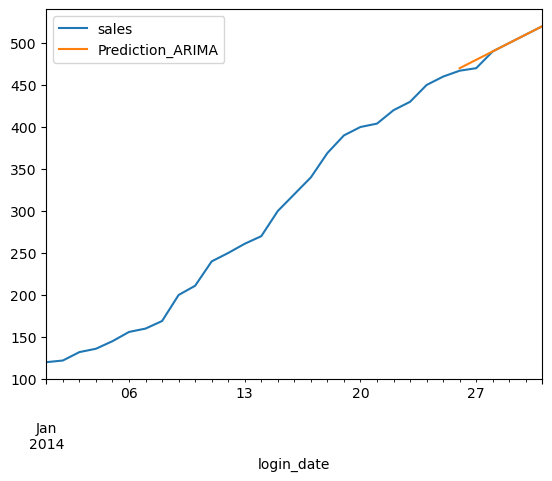

In [58]:
## Visualization
ts.plot(legend=True,label="train")
pred.plot(legend=True, label="Prediction_ARIMA")
plt.show()

In [48]:
## Find best value of pdq

p = [0,8]
d = [0,2]
q = [0,8]

In [49]:
import itertools
pdq_combination = list(itertools.product(p,d,q))
pdq_combination

[(0, 0, 0),
 (0, 0, 8),
 (0, 2, 0),
 (0, 2, 8),
 (8, 0, 0),
 (8, 0, 8),
 (8, 2, 0),
 (8, 2, 8)]

In [51]:
RMSE = []
order1 = []

for pdq in pdq_combination:
    try:
        model = sm.tsa.arima.ARIMA(train,order=pdq).fit()
        pred = model.predict(start=len(train),end=(len(ts)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        RMSE.append(error)
        order1.append(pdq)
    except:
        continue

In [52]:
RMSE

[219.50096866651046,
 137.55691202518148,
 4.262237284181758,
 11.441122334487037,
 47.098906553427426,
 9.64551949238023,
 20.72083568160614]

In [53]:
order1

[(0, 0, 0), (0, 0, 8), (0, 2, 0), (0, 2, 8), (8, 0, 0), (8, 2, 0), (8, 2, 8)]